In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
data_linear = pd.read_parquet('big_data_predictions/Gaussian_linear_predictions')
data_decision3 = pd.read_parquet('big_data_predictions/Decisiontree_regression_predictions_3')
data_decision4 = pd.read_parquet('big_data_predictions/Decisiontree_regression_predictions_4')
data_decision5 = pd.read_parquet('big_data_predictions/Decisiontree_regression_predictions_5')

In [29]:
data_linear['DecisionTree_depth3'] = data_decision3['prediction']
data_linear['DecisionTree_depth4'] = data_decision4['prediction']
data_linear['DecisionTree_depth5'] = data_decision5['prediction']

In [35]:
combined_sorted = data_linear.sort_values(by='label').reset_index(drop=True)
combined_sorted['x'] = combined_sorted.index

final_df = combined_sorted[['x', 'label', 'prediction', 'DecisionTree_depth3', 'DecisionTree_depth4', 'DecisionTree_depth5']]
final_df.rename(columns={'prediction': 'GaussianLinearRegression'}, inplace=True)

In [44]:
subs = final_df.melt(id_vars='x', var_name='Parameter', value_name='vals')

In [45]:
subs

,x,Parameter,vals
0,0,label,-0.007454
1,1,label,-0.006902
2,2,label,-0.006889
3,3,label,-0.006701
4,4,label,-0.006691
...,...,...,...
2060,408,DecisionTree_depth5,4.982293
2061,409,DecisionTree_depth5,4.982293
2062,410,DecisionTree_depth5,4.940221
2063,411,DecisionTree_depth5,4.982293


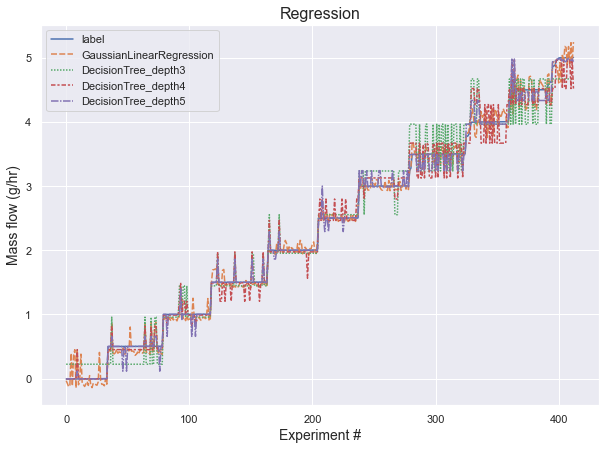

In [48]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
graph = sns.lineplot(data=subs, x='x', y='vals', hue='Parameter', style='Parameter')

graph.set_title('Regression', fontdict={'size': 16,})
graph.set_xlabel('Experiment #', fontdict={'size': 14})
graph.set_ylabel('Mass flow (g/hr)', fontdict={'size': 14})
graph.legend().set_title(None)